# *** HAVE YOU COPIED THIS TO YOUR PERSONAL SPACE? ***
# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [111]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [ ]:
# Creating arrays
a = np.zeros((3))

In [116]:
b = np.ones((2,3))

In [117]:
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [115]:
np.ones((2,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [3]:
# Note the way each array is printed:
a,b,c,d

(array([ 0.,  0.,  0.]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[[3, 1, 5, 8],
         [7, 1, 6, 5],
         [7, 3, 6, 2]],
 
        [[4, 2, 4, 1],
         [7, 6, 4, 1],
         [8, 3, 4, 4]]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [4]:
## Arithmetic in arrays is element wise

In [5]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [6]:
c = a-b
c

array([20, 29, 38, 47])

In [7]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [8]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [9]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [10]:
a[2:5]

array([ 4,  9, 16])

In [11]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [12]:
b = np.random.randint(1,100,(4,4))

In [13]:
b

array([[75, 89, 52, 97],
       [32, 15, 98, 50],
       [36, 86, 17, 40],
       [83, 58, 61, 38]])

In [14]:
# Guess the output
print(b[2,3])
print(b[0,0])


40
75


In [15]:
b[0:3,1],b[:,1]

(array([89, 15, 86]), array([89, 15, 86, 58]))

In [16]:
b[1:3,:]

array([[32, 15, 98, 50],
       [36, 86, 17, 40]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [75]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
# Index, columns, underlying numpy data
df.T
df

,A,B,C,D
2014-01-01,-1.495854,-0.748462,0.590912,0.600190
2014-01-02,0.858996,0.642661,1.546552,-0.968425
2014-01-03,0.076538,1.271456,-0.495201,1.020799
2014-01-04,0.519960,-0.857580,0.911700,0.976002
2014-01-05,-1.750910,0.307263,-1.129887,-0.093751
2014-01-06,-0.523446,0.687313,-0.670103,-1.723714


In [21]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [84]:
df2.B

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]

In [22]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [23]:
df.head()

,A,B,C,D
2014-01-01,-1.495854,-0.748462,0.590912,0.600190
2014-01-02,0.858996,0.642661,1.546552,-0.968425
2014-01-03,0.076538,1.271456,-0.495201,1.020799
2014-01-04,0.519960,-0.857580,0.911700,0.976002
2014-01-05,-1.750910,0.307263,-1.129887,-0.093751


In [24]:
df.tail()

,A,B,C,D
2014-01-02,0.858996,0.642661,1.546552,-0.968425
2014-01-03,0.076538,1.271456,-0.495201,1.020799
2014-01-04,0.519960,-0.857580,0.911700,0.976002
2014-01-05,-1.750910,0.307263,-1.129887,-0.093751
2014-01-06,-0.523446,0.687313,-0.670103,-1.723714


In [86]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [26]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.385786,0.217108,0.125662,-0.031483
std,1.067555,0.849617,1.043873,1.119528
min,-1.750910,-0.857580,-1.129887,-1.723714
25%,-1.252752,-0.484531,-0.626377,-0.749757
50%,-0.223454,0.474962,0.047855,0.253220
75%,0.409105,0.676150,0.831503,0.882049
max,0.858996,1.271456,1.546552,1.020799


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2014-01-01 to 2014-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 400.0 bytes


In [97]:
df3000.sort_values(by='B', inplace=True)
df3000

,A,B,C,D
2014-01-05,0.969649,-2.131373,-2.125912,-0.740494
2014-01-01,-0.560790,-0.042147,0.658383,-0.425502
2014-01-06,1.655169,0.235972,0.228763,0.362419
2014-01-02,-0.856161,0.815250,0.147954,-0.416149
2014-01-04,1.984544,0.989407,0.102605,-0.324479
2014-01-03,-0.731739,1.111845,0.912854,-0.045503


In [99]:
df.A

2014-01-01   -0.560790
2014-01-02   -0.856161
2014-01-03   -0.731739
2014-01-04    1.984544
2014-01-05    0.969649
2014-01-06    1.655169
Freq: D, Name: A, dtype: float64

### Selection

In [101]:
df['A','B']

KeyError: ('A', 'B')

In [29]:
df[0:3]

,A,B,C,D
2014-01-01,-1.495854,-0.748462,0.590912,0.600190
2014-01-02,0.858996,0.642661,1.546552,-0.968425
2014-01-03,0.076538,1.271456,-0.495201,1.020799


In [30]:
# By label
df.loc[dates[0]]

A   -1.495854
B   -0.748462
C    0.590912
D    0.600190
Name: 2014-01-01 00:00:00, dtype: float64

In [102]:
# multi-axis by label
df.loc[:,:]

,A,B,C,D
2014-01-01,-0.560790,-0.042147,0.658383,-0.425502
2014-01-02,-0.856161,0.815250,0.147954,-0.416149
2014-01-03,-0.731739,1.111845,0.912854,-0.045503
2014-01-04,1.984544,0.989407,0.102605,-0.324479
2014-01-05,0.969649,-2.131373,-2.125912,-0.740494
2014-01-06,1.655169,0.235972,0.228763,0.362419


In [32]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,0.642661
2014-01-03,1.271456
2014-01-04,-0.857580


In [33]:
# Fast access to scalar
df.at[dates[1],'B']

0.64266104408562186

In [34]:
# iloc provides integer locations similar to np style
df.iloc[3:]

,A,B,C,D
2014-01-04,0.519960,-0.857580,0.911700,0.976002
2014-01-05,-1.750910,0.307263,-1.129887,-0.093751
2014-01-06,-0.523446,0.687313,-0.670103,-1.723714


### Boolean Indexing

In [35]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-01,-1.495854,-0.748462,0.590912,0.600190
2014-01-05,-1.750910,0.307263,-1.129887,-0.093751
2014-01-06,-0.523446,0.687313,-0.670103,-1.723714


### Setting

In [36]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [37]:
df_posA

,A,B,C,D
2014-01-01,1.495854,0.748462,-0.590912,-0.600190
2014-01-02,0.858996,0.642661,1.546552,-0.968425
2014-01-03,0.076538,1.271456,-0.495201,1.020799
2014-01-04,0.519960,-0.857580,0.911700,0.976002
2014-01-05,1.750910,-0.307263,1.129887,0.093751
2014-01-06,0.523446,-0.687313,0.670103,1.723714


In [38]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [39]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [40]:
df['F'] = s1

In [41]:
df

,A,B,C,D,F
2014-01-01,-1.495854,-0.748462,0.590912,0.600190,NaN
2014-01-02,0.858996,0.642661,1.546552,-0.968425,1.0
2014-01-03,0.076538,1.271456,-0.495201,1.020799,2.0
2014-01-04,0.519960,-0.857580,0.911700,0.976002,3.0
2014-01-05,-1.750910,0.307263,-1.129887,-0.093751,4.0
2014-01-06,-0.523446,0.687313,-0.670103,-1.723714,5.0


### Missing Data

In [42]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [43]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [44]:
df1

,A,B,C,D,F,E
2014-01-01,-1.495854,-0.748462,0.590912,0.600190,NaN,1.0
2014-01-02,0.858996,0.642661,1.546552,-0.968425,1.0,1.0
2014-01-03,0.076538,1.271456,-0.495201,1.020799,2.0,NaN
2014-01-04,0.519960,-0.857580,0.911700,0.976002,3.0,NaN


In [45]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Operations

In [46]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,-0.385786,0.217108,0.125662,-0.031483,3.000000
std,1.067555,0.849617,1.043873,1.119528,1.581139
min,-1.750910,-0.857580,-1.129887,-1.723714,1.000000
25%,-1.252752,-0.484531,-0.626377,-0.749757,2.000000
50%,-0.223454,0.474962,0.047855,0.253220,3.000000
75%,0.409105,0.676150,0.831503,0.882049,4.000000
max,0.858996,1.271456,1.546552,1.020799,5.000000


In [47]:
df.mean(),df.mean(1) # Operation on two different axes

(A   -0.385786
 B    0.217108
 C    0.125662
 D   -0.031483
 F    3.000000
 dtype: float64, 2014-01-01   -0.263304
 2014-01-02    0.615957
 2014-01-03    0.774718
 2014-01-04    0.910016
 2014-01-05    0.266543
 2014-01-06    0.554010
 Freq: D, dtype: float64)

### Applying functions

In [48]:
df

,A,B,C,D,F
2014-01-01,-1.495854,-0.748462,0.590912,0.600190,NaN
2014-01-02,0.858996,0.642661,1.546552,-0.968425,1.0
2014-01-03,0.076538,1.271456,-0.495201,1.020799,2.0
2014-01-04,0.519960,-0.857580,0.911700,0.976002,3.0
2014-01-05,-1.750910,0.307263,-1.129887,-0.093751,4.0
2014-01-06,-0.523446,0.687313,-0.670103,-1.723714,5.0


In [49]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-01,-1.495854,-0.748462,0.590912,0.600190,NaN
2014-01-02,-0.636859,-0.105801,2.137464,-0.368236,1.0
2014-01-03,-0.560321,1.165655,1.642263,0.652564,3.0
2014-01-04,-0.040360,0.308075,2.553963,1.628566,6.0
2014-01-05,-1.791270,0.615338,1.424075,1.534815,10.0
2014-01-06,-2.314717,1.302651,0.753973,-0.188899,15.0


In [50]:
df.apply(lambda x: x.max() - x.min())

A    2.609906
B    2.129036
C    2.676439
D    2.744513
F    4.000000
dtype: float64

In [51]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [52]:
np.random.randn(10,4)

array([[ -3.44614844e-01,   4.82092471e-01,   1.97768179e-01,
          9.78210424e-01],
       [  1.36700199e-01,   4.33220998e-01,  -6.62703119e-01,
          9.36065967e-01],
       [  2.05532230e-01,  -2.82185391e-01,   3.62788809e-01,
         -1.53668831e+00],
       [  1.48588121e+00,   5.93615492e-01,   1.67103976e+00,
          3.16050630e-01],
       [ -2.98279277e-02,   9.24045592e-01,   9.59478216e-01,
          5.05495163e-01],
       [  1.07225374e+00,   3.26999706e-01,  -1.24150683e+00,
         -2.09680846e-01],
       [ -1.13891789e+00,  -1.03176664e+00,  -1.20985918e+00,
          2.29397616e-01],
       [ -1.03794771e-01,  -3.18601958e-01,   1.25701882e+00,
         -2.38093996e-04],
       [  6.50414177e-01,  -1.70293136e+00,   9.92545747e-01,
          1.04969221e+00],
       [  8.84303979e-01,   1.90741610e+00,  -1.56450473e+00,
          4.02161146e-01]])

In [53]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.276574,-0.509749,1.240857,1.363539
1,-1.317911,0.743272,0.420296,0.102422
2,0.833462,-0.556714,-1.013204,0.516132
3,-1.784553,-1.389108,1.415393,-0.636371
4,1.661070,-1.415717,-0.488722,0.173822
5,2.139652,-2.602513,-1.675041,-0.868907
6,-1.032612,1.905559,-0.120113,-0.069830
7,1.121971,0.464669,-2.131312,-1.259320
8,0.198469,0.377839,0.058925,-0.577183
9,-0.081058,-0.838112,-0.654775,-0.246102


In [54]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.276574 -0.509749  1.240857  1.363539
 1 -1.317911  0.743272  0.420296  0.102422
 2  0.833462 -0.556714 -1.013204  0.516132,
           0         1         2         3
 3 -1.784553 -1.389108  1.415393 -0.636371
 4  1.661070 -1.415717 -0.488722  0.173822
 5  2.139652 -2.602513 -1.675041 -0.868907
 6 -1.032612  1.905559 -0.120113 -0.069830,
           0         1         2         3
 7  1.121971  0.464669 -2.131312 -1.259320
 8  0.198469  0.377839  0.058925 -0.577183
 9 -0.081058 -0.838112 -0.654775 -0.246102]

In [55]:
pd.concat(pieces)

,0,1,2,3
0,-0.276574,-0.509749,1.240857,1.363539
1,-1.317911,0.743272,0.420296,0.102422
2,0.833462,-0.556714,-1.013204,0.516132
3,-1.784553,-1.389108,1.415393,-0.636371
4,1.661070,-1.415717,-0.488722,0.173822
5,2.139652,-2.602513,-1.675041,-0.868907
6,-1.032612,1.905559,-0.120113,-0.069830
7,1.121971,0.464669,-2.131312,-1.259320
8,0.198469,0.377839,0.058925,-0.577183
9,-0.081058,-0.838112,-0.654775,-0.246102


In [56]:
# Also can "Join" and "Append"
df

,0,1,2,3
0,-0.276574,-0.509749,1.240857,1.363539
1,-1.317911,0.743272,0.420296,0.102422
2,0.833462,-0.556714,-1.013204,0.516132
3,-1.784553,-1.389108,1.415393,-0.636371
4,1.661070,-1.415717,-0.488722,0.173822
5,2.139652,-2.602513,-1.675041,-0.868907
6,-1.032612,1.905559,-0.120113,-0.069830
7,1.121971,0.464669,-2.131312,-1.259320
8,0.198469,0.377839,0.058925,-0.577183
9,-0.081058,-0.838112,-0.654775,-0.246102


### Grouping


In [57]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [58]:
df

,A,B,C,D
0,foo,one,1.859542,0.410448
1,bar,one,0.892545,-0.461392
2,foo,two,0.256464,0.207378
3,bar,three,0.482752,1.588220
4,foo,two,-0.002741,-1.565586
5,bar,two,-1.945180,-0.807828
6,foo,one,0.382845,-1.212287
7,foo,three,-0.749515,0.648718


In [59]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.892545 -0.461392
    three  0.482752  1.588220
    two   -1.945180 -0.807828
foo one    2.242387 -0.801839
    three -0.749515  0.648718
    two    0.253723 -1.358208

### Reshaping

In [60]:
# You can also stack or unstack levels

In [61]:
a = df.groupby(['A','B']).sum()

In [62]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  0.892545  0.482752 -1.945180 -0.461392  1.588220 -0.807828
foo  1.121194 -0.749515  0.126861 -0.400920  0.648718 -0.679104

### Time Series


In [63]:
import pandas as pd
import numpy as np

In [64]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [65]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [66]:
ts

2014-01-01 00:00:00    484
2014-01-01 00:00:01    101
2014-01-01 00:00:02    247
2014-01-01 00:00:03    407
2014-01-01 00:00:04    213
2014-01-01 00:00:05    347
2014-01-01 00:00:06     71
2014-01-01 00:00:07     35
2014-01-01 00:00:08    229
2014-01-01 00:00:09    152
2014-01-01 00:00:10    180
2014-01-01 00:00:11     83
2014-01-01 00:00:12    368
2014-01-01 00:00:13    179
2014-01-01 00:00:14    308
2014-01-01 00:00:15    317
2014-01-01 00:00:16    330
2014-01-01 00:00:17    217
2014-01-01 00:00:18     50
2014-01-01 00:00:19    410
2014-01-01 00:00:20    371
2014-01-01 00:00:21      9
2014-01-01 00:00:22    241
2014-01-01 00:00:23     15
2014-01-01 00:00:24     25
2014-01-01 00:00:25    421
2014-01-01 00:00:26     98
2014-01-01 00:00:27    400
2014-01-01 00:00:28    234
2014-01-01 00:00:29    204
                      ... 
2014-01-01 00:01:10    322
2014-01-01 00:01:11    362
2014-01-01 00:01:12    212
2014-01-01 00:01:13    382
2014-01-01 00:01:14     25
2014-01-01 00:01:15    124
2

In [67]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    277.466667
2014-01-01 00:01:00    214.850000
Freq: T, dtype: float64

In [68]:
# Many additional time series features
ts. #use tab

SyntaxError: invalid syntax (<ipython-input-68-5c9240a56f62>, line 2)

### Plotting


In [103]:
ts.plot()

In [104]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

In [105]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [106]:
# Pandas plot function will print with labels as default

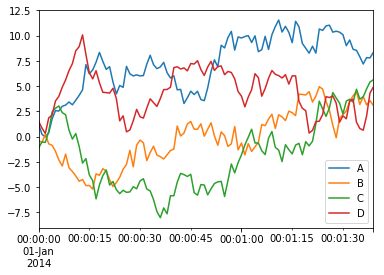

In [107]:
%matplotlib inline
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas